# Aprendizagem Estatística - Regressão


### Exercício:

**Utilize a base Advertising.csv**

Implemente um regressor para ajustar prever o volume de sales em função das demais variáveis independentes.  

* Advertising data sales (in thousands of units)
* Particular product advertising budgets (in thousands of dollars) for TV
* Particular product advertising budgets (in thousands of dollars) for radio
* Particular product advertising budgets (in thousands of dollars) for newspaper media

Sobre a base de dados:

* O banco de dados possui apenas valores contínuos, decimais numéricos
* Não existem valores nulos ou ausentes
* Total de 200 observações

Mostre a acurácia e analise os resultados y_hat ajustados

In [9]:
import pandas as pd
import numpy as np

# criei essa classe para automatizar algumas etapas do processo de análise e regressão
import rubia_models

In [10]:
# load data as a pandas.dataframe object and pass it to the class

df = pd.read_csv('Advertising.csv', index_col=0)

In [11]:
# load the class rubia_models and show important info about the dataset
# flag debug mode to True to show warning messages

rm = rubia_models.rubia_models(df, width=125, debug=False)
rm.describe(rm.data_raw)

# conclusões: 
# 1. um dataset pequeno, apenas 768 registros, pode apresentar variações relevantes em train_test_split (alerta)
# 2. o dataset não possui nenhum valor NA (count=768) porém ainda pode ter valores ausentes, avaliar isto mais detalhadamente

***************************************************************************************************************************** 
*
* DATA OVERVIEW FOR THIS DATASET 
*
* DATA SHAPE:  (200, 4)
* COLUMNS INFO:  TV (float64), radio (float64), newspaper (float64), sales (float64)
* 
*****************************************************************************************************************************

DATA SAMPLE: 


,TV,radio,newspaper,sales
28,240.1,16.7,22.9,15.9
121,141.3,26.8,46.2,15.5
126,87.2,11.8,25.9,10.6
139,43.0,25.9,20.5,9.6
37,266.9,43.8,5.0,25.4



STATISTICS: 


,count,mean,std,min,25%,50%,75%,max
TV,200.0,147.0425,85.854236,0.7,74.375,149.75,218.825,296.4
radio,200.0,23.2640,14.846809,0.0,9.975,22.90,36.525,49.6
newspaper,200.0,30.5540,21.778621,0.3,12.750,25.75,45.100,114.0
sales,200.0,14.0225,5.217457,1.6,10.375,12.90,17.400,27.0


***************************************************************************************************************************** 
*
* FEATURE EXTRACTION REPORT 
*
* X:  TV | radio | newspaper
* y:  sales
* M:  (200, 3) | (200, 1)
* 
*****************************************************************************************************************************



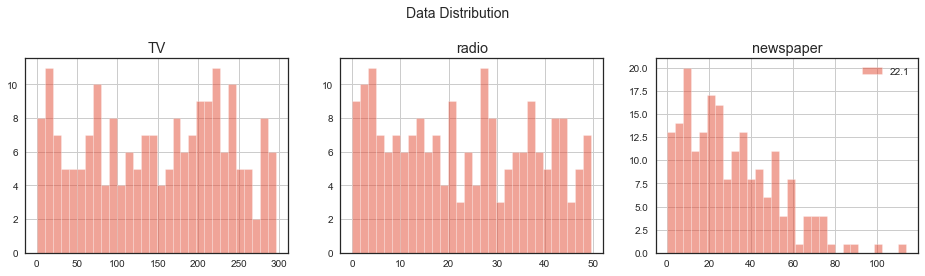

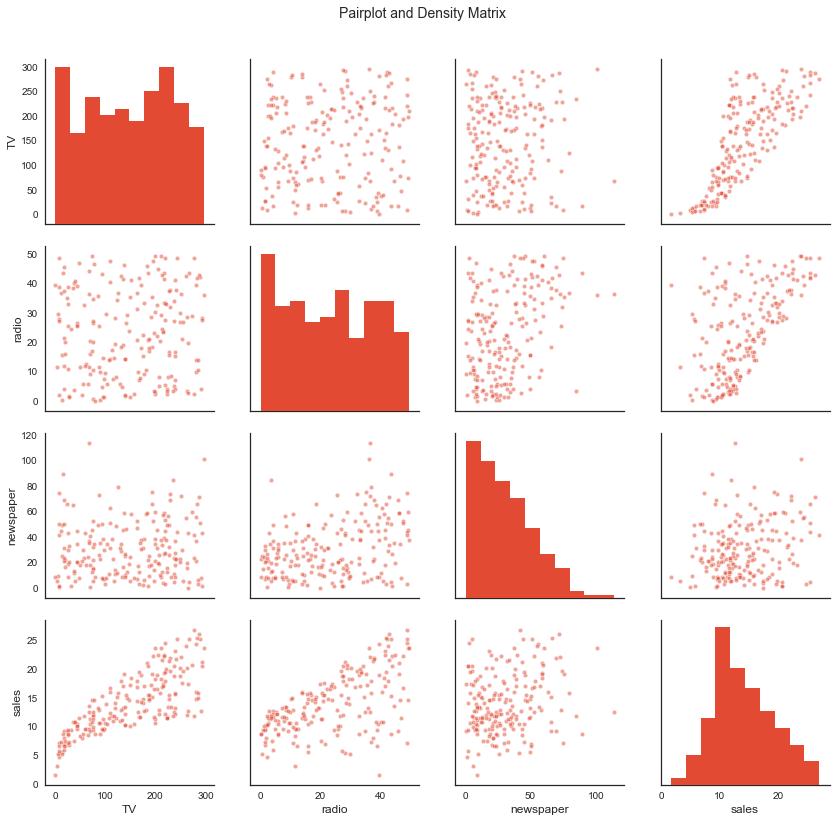

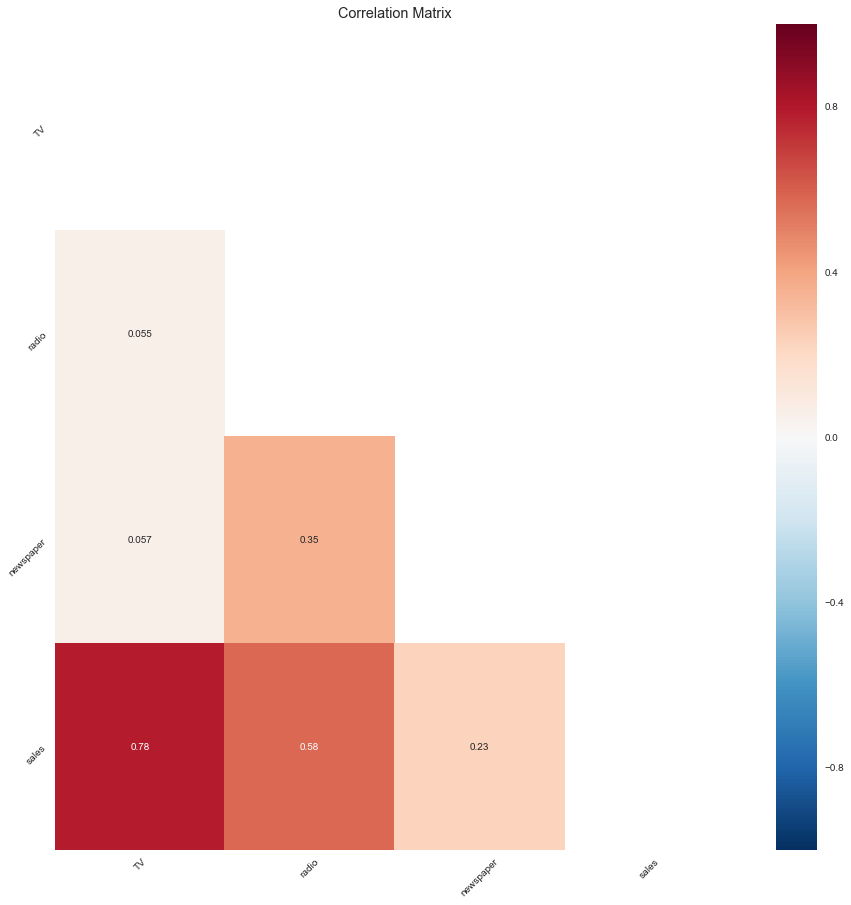

In [12]:
# please inform the output column here, a list of columns can also be ignored if necessary
# columns listed as ignored will be discarded while modeling
# flag graph to true to show some exploratory and correlation graphs on the dataset

y_col = 'sales'
ignore_cols = []
rm.explore(rm.data_raw, y_col, ignore_cols, graph=True) #updates X, y, M

# conclusões: 
# 1. a dimensão de domínio dos diferentes Xs é diversificada indo de dezena a centenar, é prudente a transformação destes dados
# 2. TV apresenta correlação forte com a variável dependente porém limitada a 78% -> requer modelagem avançada
# 3. observamos presença de correlação não linear, vamos adicionar alguns termos polinomiais ou cruzados e avaliar

In [13]:
# encode every column of type object or string to categorical numbers
#rm.encode()

# conclusões:
# 1. este dataset não requer a codificação de nenhuma coluna, todos os valores já são contínuos

In [14]:
# add higher level and interaction terms to the model
# be carefull when using higher level terms and graphs together, less powerfull hardware can bottleneck with higher complexity

rm.addTerms(rm.X, rm.y, levels=2, interaction=True, root=True)
rm.explore(rm.M, y_col, ignore_cols, graph=False) #updates X, y, M

# conclusões:
# 1. adicionamos alguns termos de ordem 2, termo raíz quadrático e termos de interação
# 2. o número de  variáveis preditoras subiu de 3 parra 12 neste caso, volume aceitável para modelagem -> vamos seguir assim

***************************************************************************************************************************** 
*
* FEATURE EXTRACTION REPORT 
*
* X:  TV | radio | newspaper | TV*TV | TV*radio | TV*newspaper | radio*radio | radio*newspaper | newspaper*newspaper | sqroot_TV | sqroot_radio | sqroot_newspaper
* y:  sales
* M:  (200, 12) | (200, 1)
* 
*****************************************************************************************************************************



In [15]:
# analyse if this is a regression or a classification problem and evaluate some models
# when y is float or has more then 10 different classes, the algorithm turns into a regression algorithm automatically
# else it will perform a classification modeling

rm.analyse(y_col)
print(rm.strategy)

# conclusões:
# 1. o algoritmo identificou automaticamente este como sendo um problema de regressão

regression


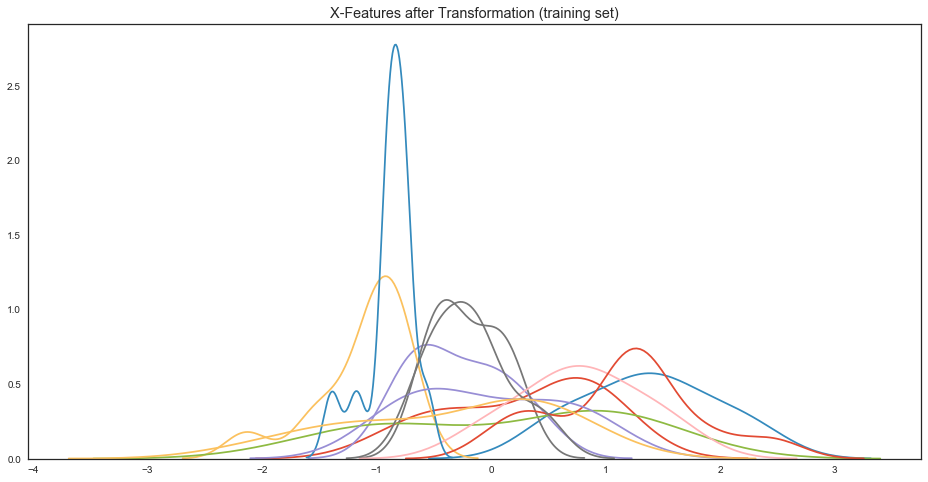



***************************************************************************************************************************** 
*
* REGRESSION RESULTS - BEFORE PARAMETERS BOOSTING 
*
***************************************************************************************************************************** 


,Regressor,Score (avg),Score (std),Score (VC)
0,Linear regressor,0.164820,0.097695,59.273421
3,Ridge regressor,0.164820,0.097695,59.273421
4,Ridge CV regressor,0.166638,0.106404,63.853151
2,Lasso CV regressor,0.226117,0.225131,99.563914
14,Gradient boost regressor,0.313139,0.157863,50.413048
12,Random forest regressor,0.384992,0.195753,50.845997
9,SGD regressor,0.412261,0.482699,117.085691
13,Ada boost regressor,0.609343,0.338318,55.521763
10,Decision tree regressor,0.797143,0.701908,88.053017
6,K nearest neighbors regressor K2d,1.564319,0.696120,44.499860


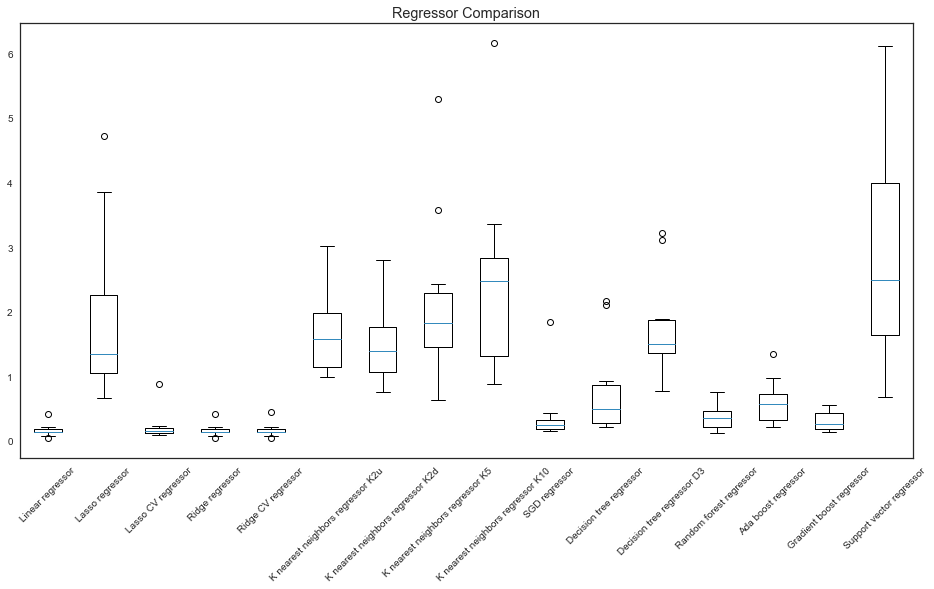

In [19]:
# define a few mode parameters and call the model evaluation procedure

alphas = 10 ** np.linspace(10, -2, 100) * 0.5
rm.evaluate(test_size=0.3, transformX='xstandard', transformY='ynone', folds=10, alphas=alphas, graph=True, metric='neg_mean_squared_error')

# conclusões:
# 1. os regressores lineares apresentaram ótimo desempenho com as transformações propostas



***************************************************************************************************************************** 
*
* MODEL PERFORMANCE 
*
* MODEL NAME:  Random forest regressor
* TEST SAMPLE SIZE:  60
* RSS: 17.53
* R2: 0.99
* 
***************************************************************************************************************************** 



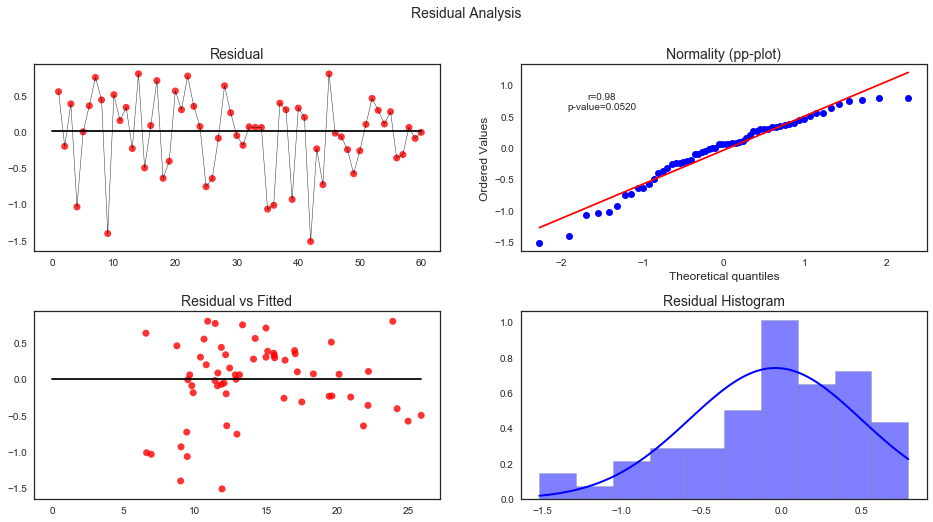

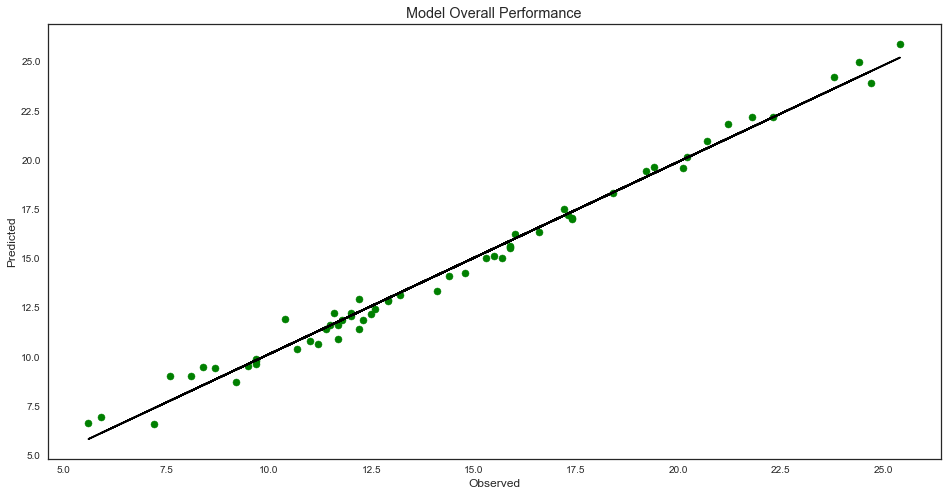

In [20]:
rm.test('Random forest regressor', graph=True)

# conclusões:
# 1. o RSS foi aceitável com um excelente R2 na base de teste
# 2. todas as premissas sobre o resíduo estão bem atendidas



***************************************************************************************************************************** 
*
* MODEL PERFORMANCE 
*
* MODEL NAME:  Linear regressor
* TEST SAMPLE SIZE:  60
* RSS: 7.26
* R2: 0.99
* 
***************************************************************************************************************************** 



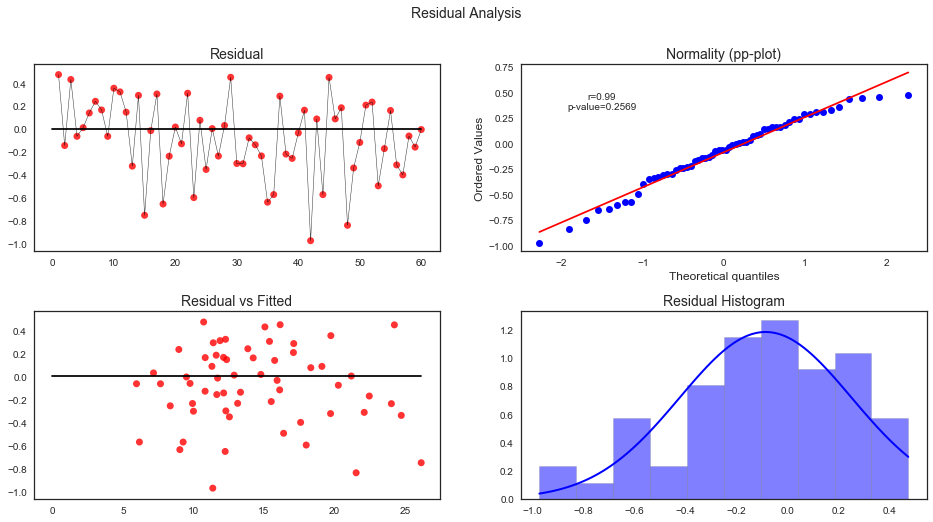

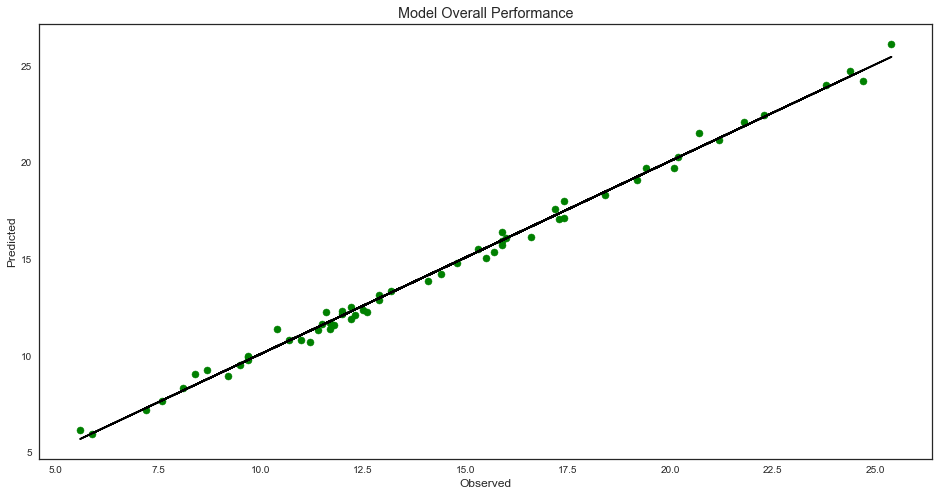

In [21]:
rm.test('Linear regressor', graph=True)

# conclusões:
# 1. o RSS foi aceitável com um excelente R2 na base de teste
# 2. todas as premissas sobre o resíduo estão bem atendidas

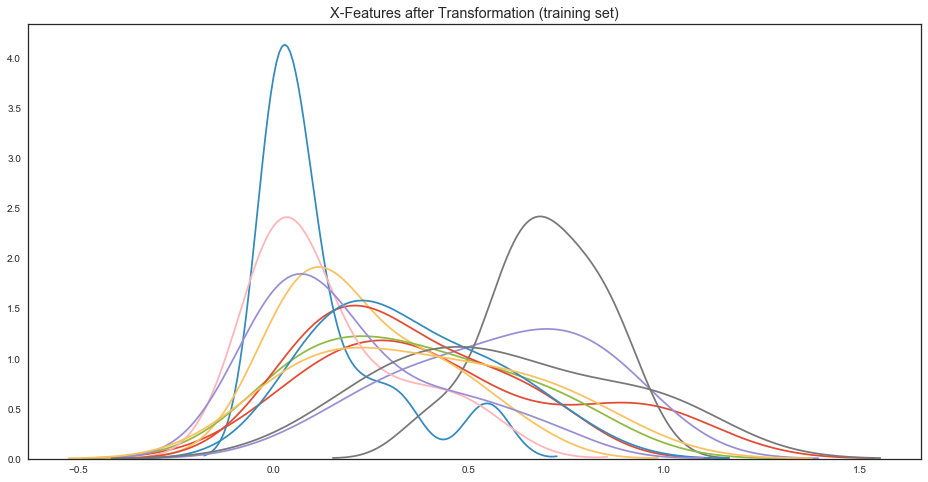



***************************************************************************************************************************** 
*
* REGRESSION RESULTS - BEFORE PARAMETERS BOOSTING 
*
***************************************************************************************************************************** 


,Regressor,Score (avg),Score (std),Score (VC)
3,Ridge regressor,0.166157,0.102881,61.917928
0,Linear regressor,0.166157,0.102881,61.917928
4,Ridge CV regressor,0.182274,0.171426,94.048441
2,Lasso CV regressor,0.207742,0.234782,113.016636
14,Gradient boost regressor,0.340402,0.209358,61.503285
12,Random forest regressor,0.344157,0.221283,64.297113
13,Ada boost regressor,0.588661,0.298094,50.639283
10,Decision tree regressor,0.699500,0.443428,63.392134
9,SGD regressor,1.570649,1.402960,89.323631
11,Decision tree regressor D3,1.612882,0.444020,27.529598


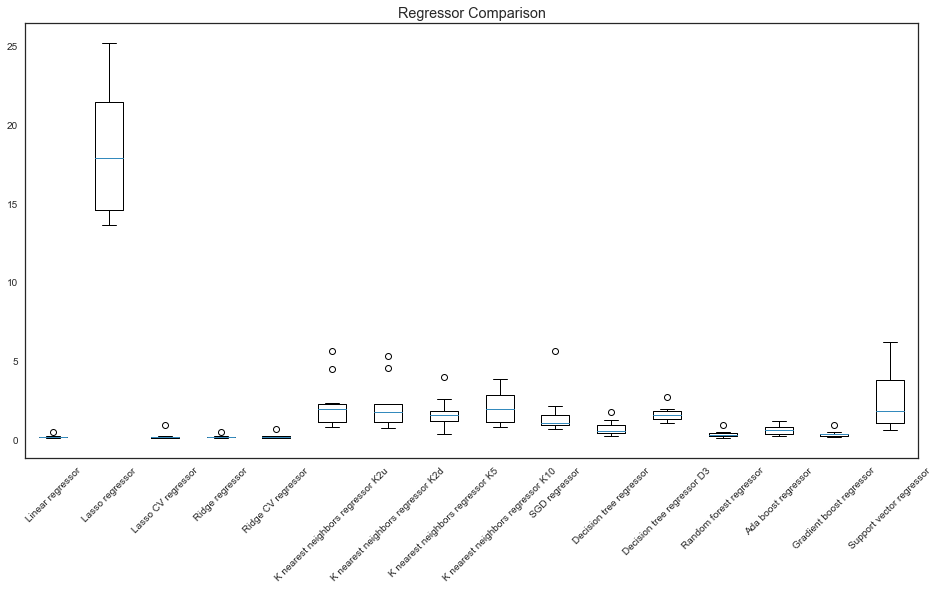

In [22]:
# vamos testar outra transformação em X e avaliar novamente

rm.evaluate(test_size=0.3, transformX='xminmax', transformY='ynone', folds=10, alphas=alphas, graph=True, metric='neg_mean_squared_error')

# conclusões:
# 1. desempenhos semelhantes



***************************************************************************************************************************** 
*
* MODEL PERFORMANCE 
*
* MODEL NAME:  Random forest regressor
* TEST SAMPLE SIZE:  60
* RSS: 14.28
* R2: 0.99
* 
***************************************************************************************************************************** 



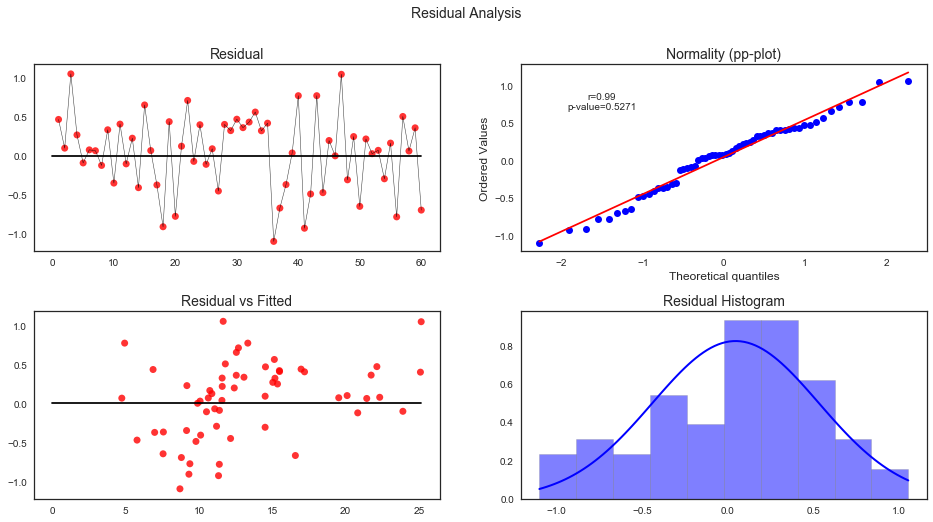

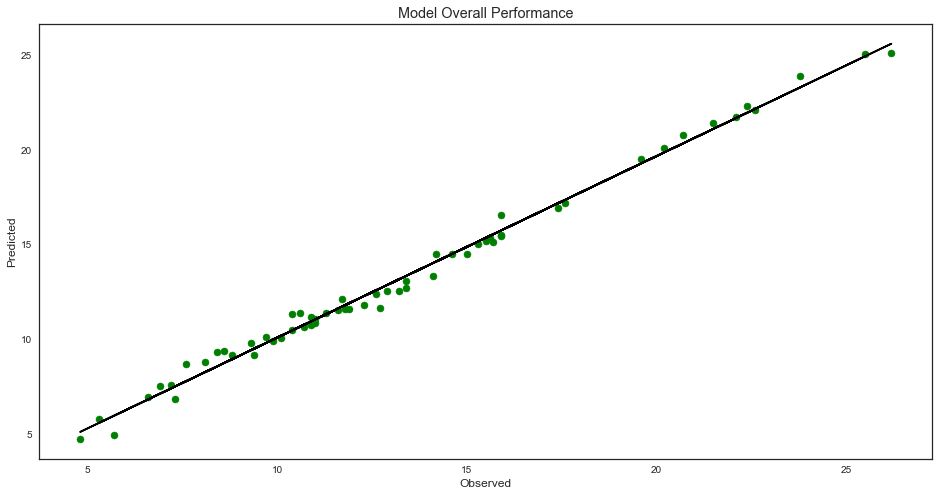

In [23]:
rm.test('Random forest regressor', graph=True)

# conclusões:
# 1. desempenhos semelhantes



***************************************************************************************************************************** 
*
* MODEL PERFORMANCE 
*
* MODEL NAME:  Linear regressor
* TEST SAMPLE SIZE:  60
* RSS: 8.32
* R2: 0.99
* 
***************************************************************************************************************************** 



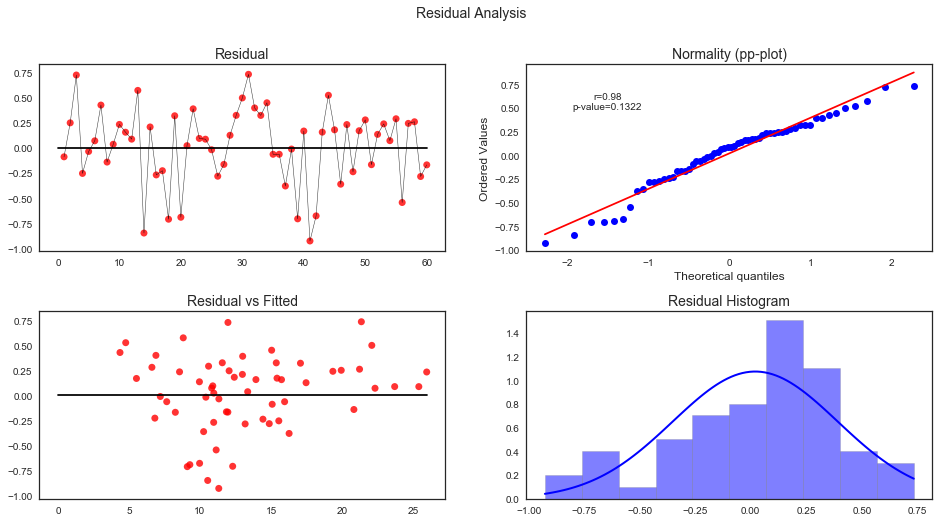

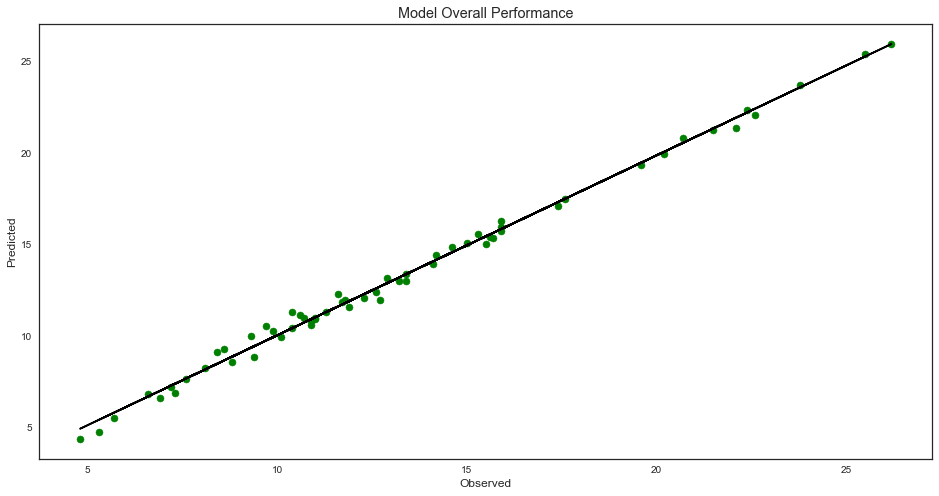

In [24]:
rm.test('Linear regressor', graph=True)

# conclusões:
# 1. desempenhos semelhantes

## Resultados:
* Encontramos valores de R2 muito próximos de 1 para vários modelos  
* Houve uma maior variação entre os modelos, sendo que os KNN e SVR não performaram bem neste problema
* O desempenho sem usar os termos cruzados (de interação) foram semelhantes indicando que poderiam ser removidos com segurança